## Import Necessary Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

## Load the Data

In [2]:
df= pd.read_csv("/content/drive/MyDrive/spam.csv", encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


## Data Cleaning and Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
df.isnull().sum()/(df.count()+df.isnull().sum())*100

v1             0.000000
v2             0.000000
Unnamed: 2    99.102656
Unnamed: 3    99.784637
Unnamed: 4    99.892319
dtype: float64

In [5]:
#remove ['Unnamed: 2','Unnamed: 3','Unnamed: 4'] because they have 99% missing values
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1, inplace=True)

In [6]:
#Check Duplicatetion
df.duplicated().sum()

403

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
#rename the cols
df.rename(columns={'v1':'label', 'v2':'EmailText'}, inplace=True)

In [9]:
# Import label encoder
from sklearn import preprocessing

# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
df['label']= label_encoder.fit_transform(df['label'])

after_encodor=df['label'].unique()
before_encodor=label_encoder.inverse_transform(df['label'].unique())
print(list(zip(after_encodor,before_encodor)))


[(0, 'ham'), (1, 'spam')]


In [10]:
df.head()

,label,EmailText
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## Exploratory Data Analysis (EDA)

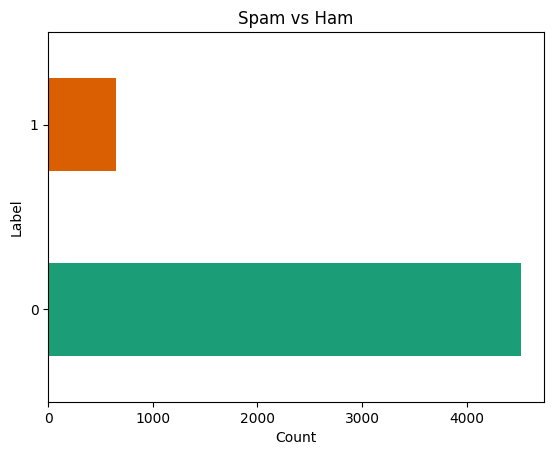

In [11]:
# @title Visualisation 1
df.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.xlabel('Count')
plt.ylabel('Label')
plt.title('Spam vs Ham')
plt.show()

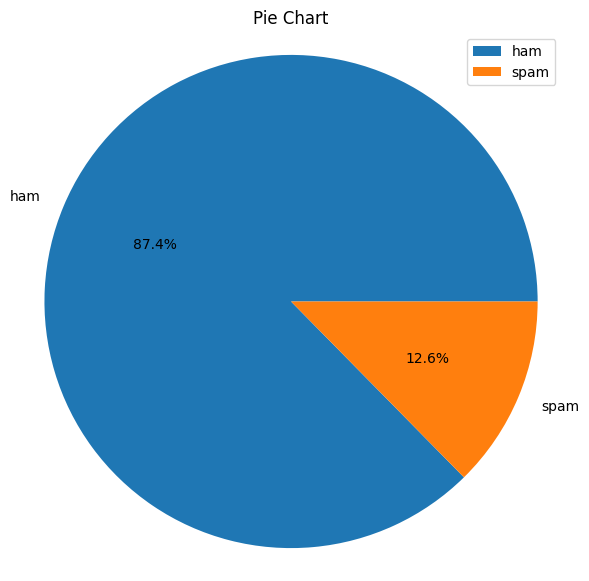

In [12]:
# @title Visualisation 2
plt.figure(figsize=(7,7))
plt.pie( df['label'].value_counts(), labels=before_encodor, autopct="%1.1f%%")  # autopct for percentage display with one decimal place
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# Customize the plot (optional)
plt.title("Pie Chart")
plt.legend()
# Display the plot
plt.show()

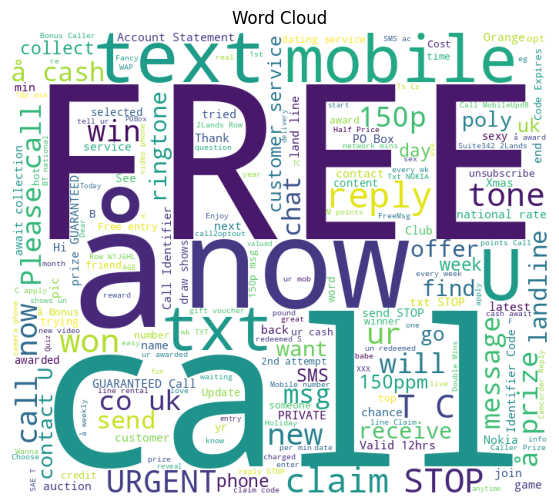

In [13]:
# @title Word Cloud for Spam Emails

from wordcloud import WordCloud

# Create the WordCloud object
wordcloud = WordCloud(background_color="white", width=700, height=600).generate(df[df['label'] == 1]['EmailText'].str.cat(sep = " "))

# Display the word cloud
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Word Cloud")
plt.show()

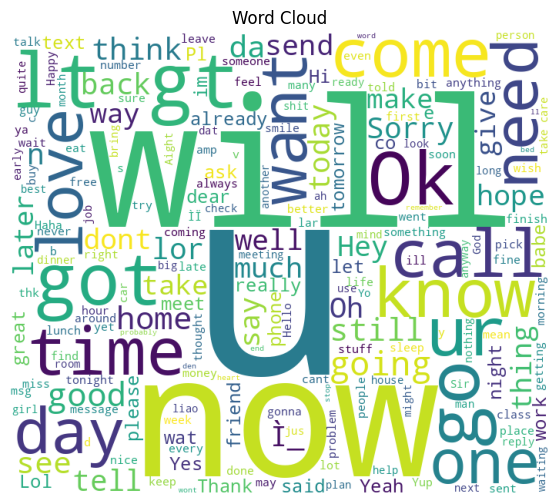

In [14]:
# @title Word Cloud for Ham Emails
# Create the WordCloud object
wordcloud = WordCloud(background_color="white", width=700, height=600).generate(df[df['label'] == 0]['EmailText'].str.cat(sep = " "))

# Display the word cloud
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Word Cloud")
plt.show()

## Data Splitting

In [18]:
X= df['EmailText']
y=df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

## Feature Extraction




CountVectorizer is a text processing technique used in Natural Language Processing (NLP) tasks, specifically for feature extraction from text data. It works by converting a collection of text documents into a numerical matrix, where each row represents a document and each column represents a unique word or token (e.g., word, character n-gram). The value in each cell represents the count of how many times that particular word or token appears in the corresponding document.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

## Training The Model

In [107]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

pipline_model =Pipeline([
    ('vectorizer',CountVectorizer()),
    #('LR',LogisticRegression())
    #('svc',SVC()),
    ('LR',MultinomialNB())
])

In [108]:
pipline_model.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('LR', MultinomialNB())])

In [129]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

y_pred = pipline_model.predict(X_test)

print("Accuracy:",accuracy_score(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))

Accuracy: 0.9912959381044487
F1 Score: 0.9623430962343097
Precision: 0.9913793103448276
Recall: 0.9349593495934959


Text(95.72222222222221, 0.5, 'Actual')

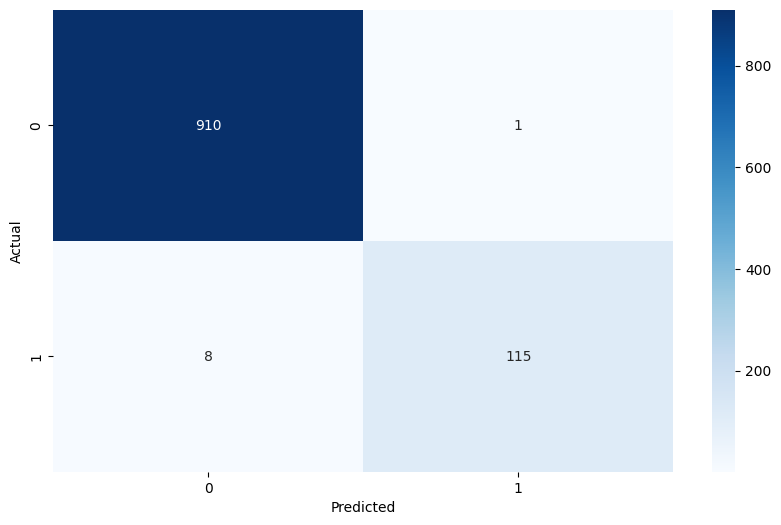

In [130]:
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [131]:
emails_examples =[
    'Sounds great! Are you home now?',
    'Hey Sam, Are you coming for a cricket game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
pipline_model.predict(emails_examples)

array([0, 0, 1])

## save the model The Model

In [132]:
import joblib
joblib.dump(pipline_model,'spam_model.pkl')

['spam_model.pkl']